# getting data

change the working directory first, so everything gets downloaded in this directory.

In [1]:
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
sns.set(rc={'figure.figsize':(2,2)})

In [5]:
os.chdir('/content/drive/My Drive/Colab Notebooks/QMNIST')

In [ ]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/QMNIST'

### getting train data

In [6]:
from torchvision.datasets import QMNIST as torchvision_QMNIST

In [7]:
def load_qmnist_data(data_set):
    '''
    Arguments =
    data_set: type of dataset, I need, 'train' for train set and 'test' for test set.
    Returns = x and y of chosen set (train or test) as numpy arrays
    '''
    if data_set == 'train':
        # first connect and dowload to a directory
        qmnist_train = torchvision_QMNIST(root='/content/drive/My Drive/Colab Notebooks/QMNIST/qmnist',
                                          train=True, download=True)
        # get x tensor in the numpy array type
        train_x = qmnist_train.train_data.numpy()
        # now get y tensor in numpy format
        train_y_temp = qmnist_train.train_labels.numpy()
        # since ys in qmnist has more details than labels, let's extract only the labels
        train_y = np.array([i[0] for i in train_y_temp[:]])
        # return them now
        return train_x, train_y

    elif data_set == 'test':
        qmnist_test = torchvision_QMNIST(root='/content/drive/My Drive/Colab Notebooks/QMNIST/qmnist',
                                         train=False, download=True)
        test_x = qmnist_test.test_data.numpy()
        test_y_temp = qmnist_test.test_labels.numpy()
        test_y = np.array([i[0] for i in test_y_temp[:]])
        return test_x, test_y

    else:
        return None, None

In [8]:
train_x, train_y = load_qmnist_data('train')

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [9]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [10]:
def plot_image_with_target(x_array, y_array, index_num):
    print('label: ' + str(y_array[index_num]))
    plt.imshow(x_array[index_num], interpolation='nearest')
    plt.show()
    return None

sanity check

label: 0


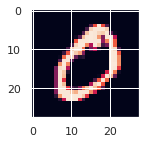

label: 7


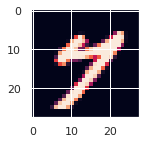

label: 8


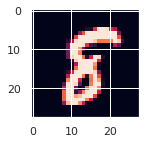

label: 0


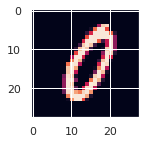

label: 3


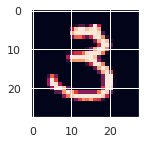

label: 3


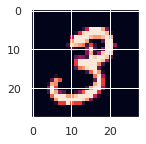

label: 0


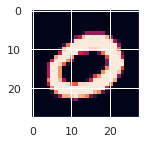

label: 7


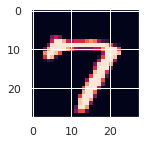

label: 6


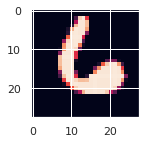

label: 7


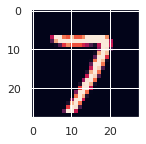

label: 8


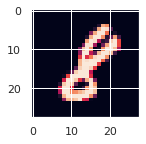

label: 9


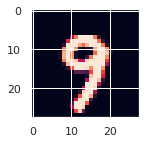

label: 4


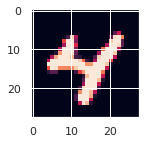

label: 1


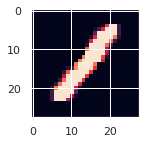

label: 1


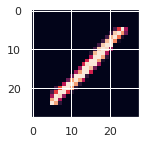

label: 1


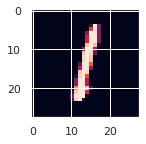

label: 2


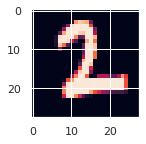

label: 6


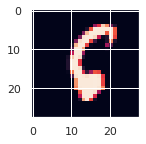

label: 3


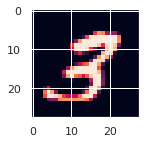

label: 5


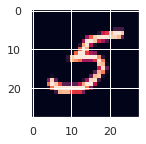

label: 9


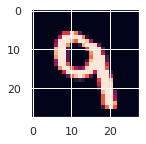

label: 3


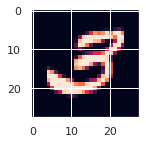

label: 8


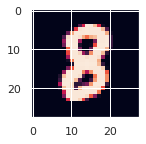

label: 2


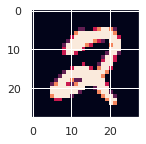

label: 5


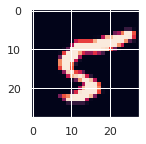

label: 4


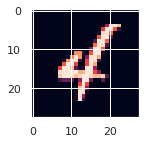

label: 7


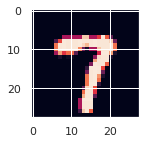

label: 4


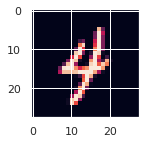

label: 6


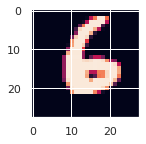

label: 9


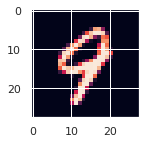

label: 7


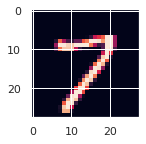

label: 1


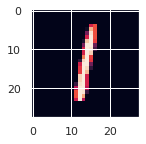

label: 5


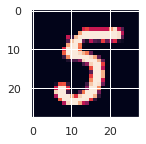

label: 5


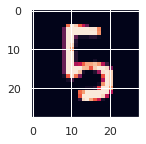

label: 8


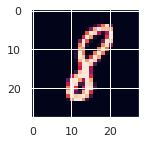

label: 1


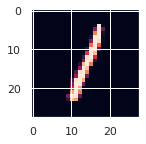

label: 2


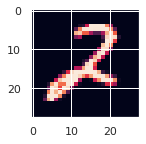

label: 7


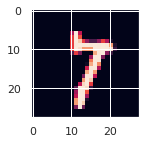

label: 7


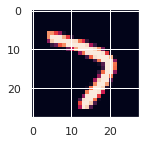

label: 8


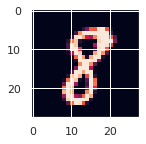

label: 7


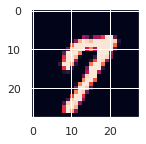

label: 5


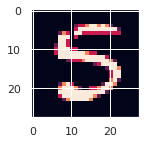

label: 2


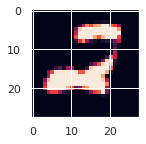

label: 9


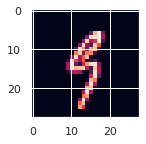

label: 9


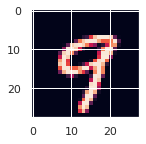

label: 1


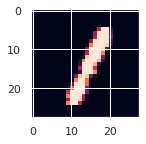

label: 2


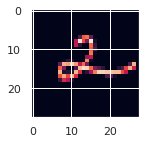

label: 4


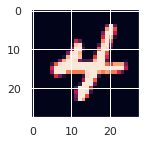

label: 7


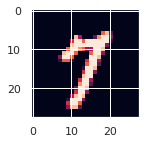

label: 4


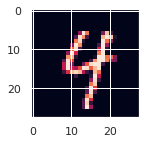

label: 8


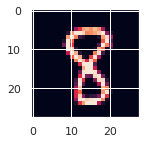

label: 2


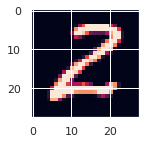

label: 2


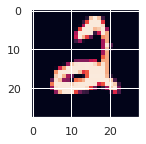

label: 1


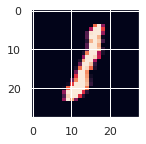

label: 3


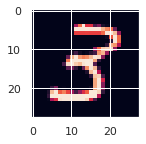

label: 2


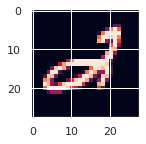

label: 8


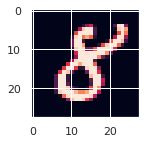

label: 8


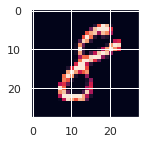

label: 3


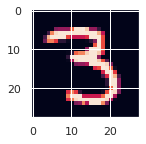

label: 3


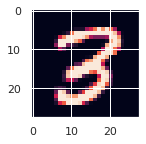

In [13]:
for i in range(1,60_000, 1_000):
    plot_image_with_target(train_x, train_y, index_num=i)

### getting test data

In [14]:
test_x, test_y = load_qmnist_data('test')

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [15]:
test_x.shape, test_y.shape

((60000, 28, 28), (60000,))

label: 2


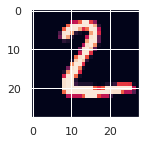

label: 0


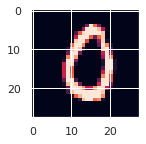

label: 5


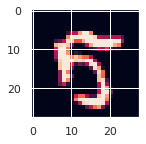

label: 9


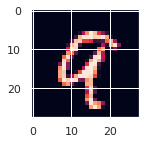

label: 4


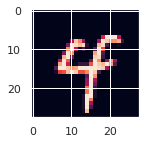

label: 9


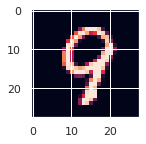

label: 8


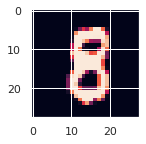

label: 2


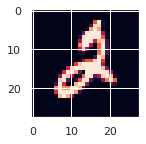

label: 9


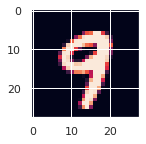

label: 6


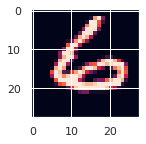

label: 8


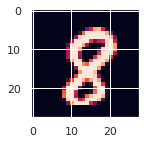

label: 6


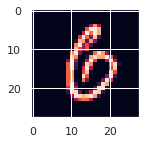

label: 3


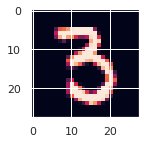

label: 7


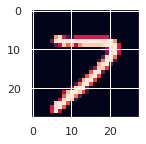

label: 8


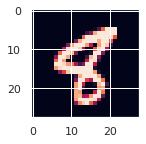

label: 9


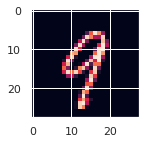

label: 8


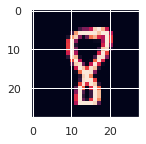

label: 6


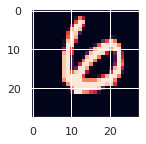

label: 3


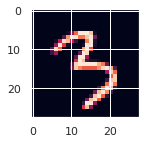

label: 6


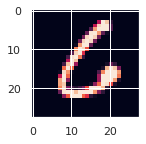

label: 0


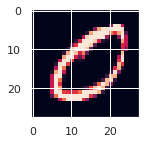

label: 7


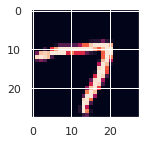

label: 4


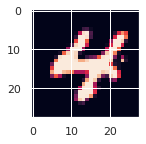

label: 4


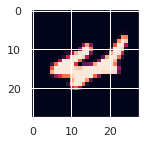

label: 4


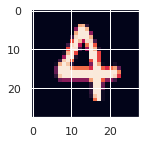

label: 7


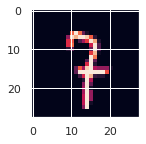

label: 6


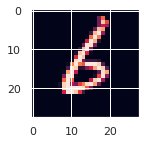

label: 6


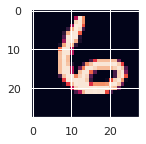

label: 3


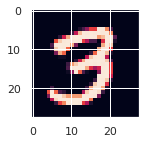

label: 6


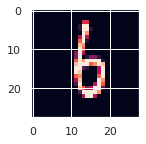

label: 0


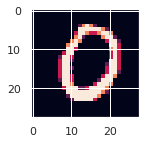

label: 6


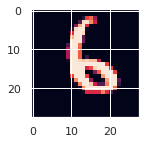

label: 8


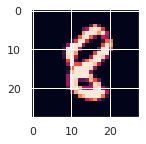

label: 4


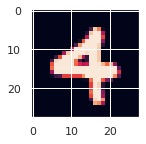

label: 6


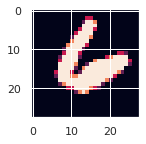

label: 4


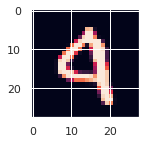

label: 9


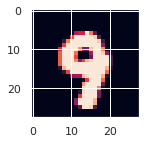

label: 7


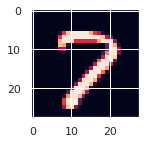

label: 3


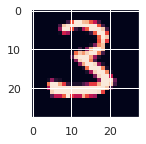

label: 7


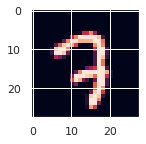

label: 6


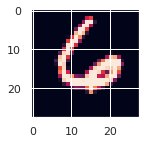

label: 5


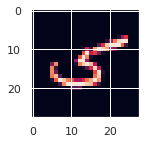

label: 6


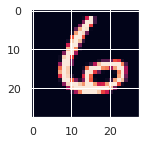

label: 8


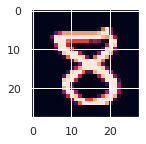

label: 7


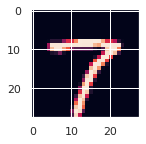

label: 6


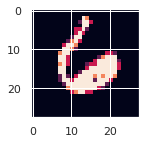

label: 0


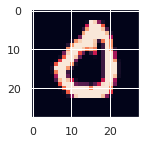

label: 8


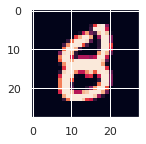

label: 8


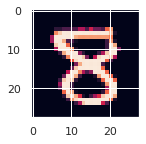

label: 8


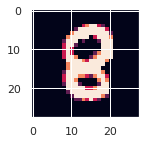

label: 5


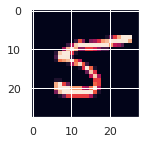

label: 1


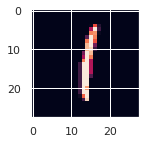

label: 1


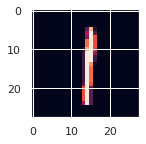

label: 5


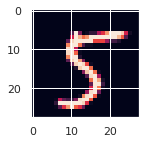

label: 7


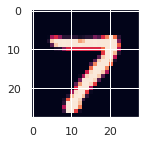

label: 2


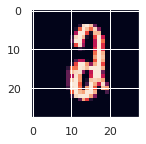

label: 3


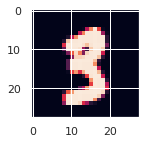

label: 1


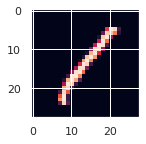

label: 4


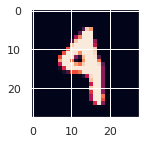

label: 5


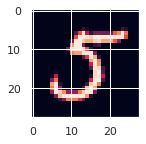

In [16]:
for i in range(1,60_000, 1_000):
    plot_image_with_target(test_x, test_y, index_num=i)

# data preprocessing

### null check

In [17]:
np.argwhere(np.isnan(train_x))

array([], shape=(0, 3), dtype=int64)

In [18]:
np.argwhere(np.isnan(train_y))

array([], shape=(0, 1), dtype=int64)

In [19]:
np.argwhere(np.isnan(test_x))

array([], shape=(0, 3), dtype=int64)

In [20]:
np.argwhere(np.isnan(test_y))

array([], shape=(0, 1), dtype=int64)

### normalise pictures

We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [21]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 176,  25, 167, 255, 248, 126,   0,   0,
          0,   0],
       [  

In [22]:
train_x = train_x / 255.0
test_x = test_x / 255.0

label: 2


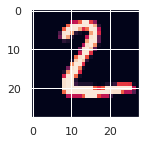

label: 0


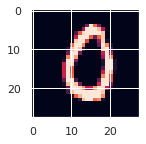

label: 5


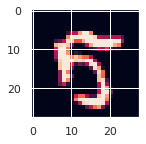

label: 9


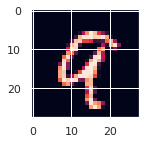

label: 4


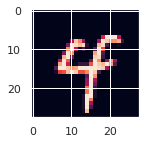

label: 9


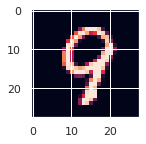

label: 8


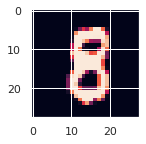

label: 2


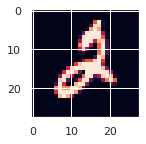

label: 9


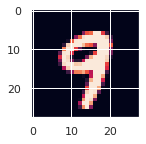

label: 6


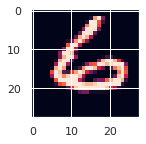

label: 8


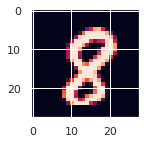

label: 6


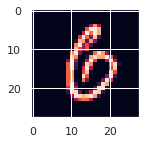

label: 3


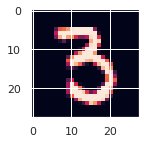

label: 7


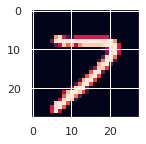

label: 8


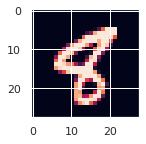

label: 9


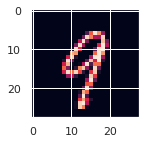

label: 8


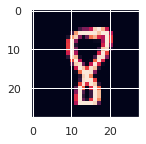

label: 6


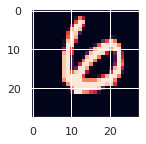

label: 3


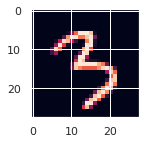

label: 6


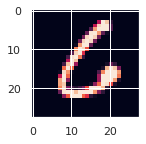

label: 0


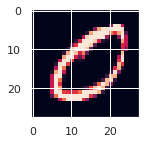

label: 7


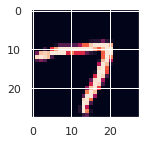

label: 4


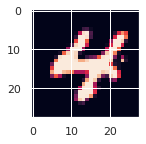

label: 4


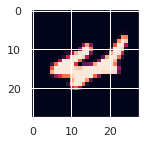

label: 4


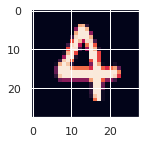

label: 7


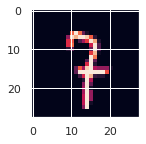

label: 6


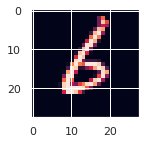

label: 6


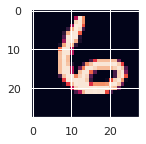

label: 3


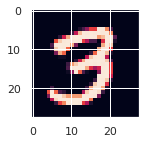

label: 6


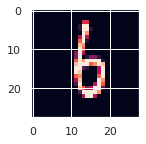

label: 0


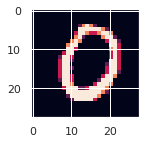

label: 6


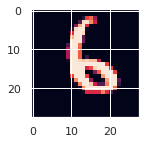

label: 8


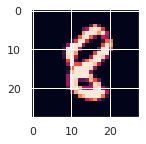

label: 4


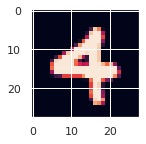

label: 6


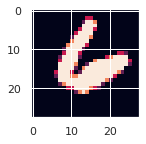

label: 4


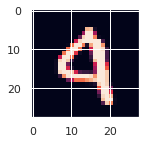

label: 9


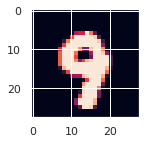

label: 7


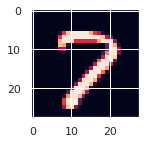

label: 3


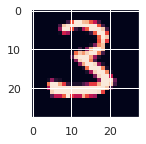

label: 7


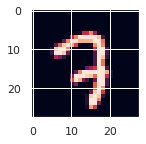

label: 6


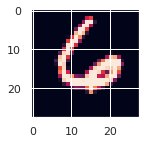

label: 5


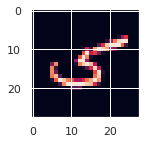

label: 6


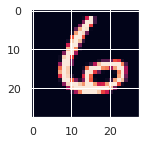

label: 8


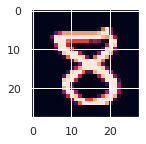

label: 7


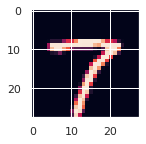

label: 6


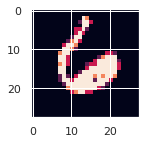

label: 0


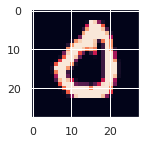

label: 8


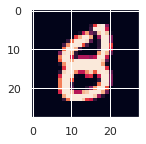

label: 8


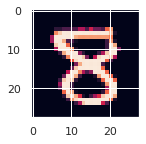

label: 8


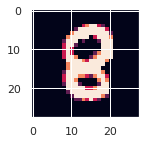

label: 5


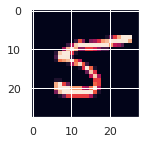

label: 1


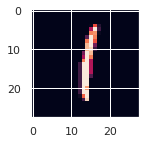

label: 1


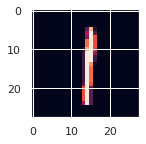

label: 5


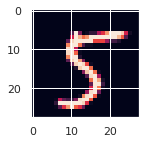

label: 7


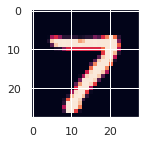

label: 2


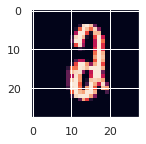

label: 3


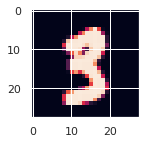

label: 1


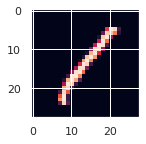

label: 4


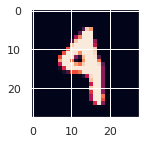

label: 5


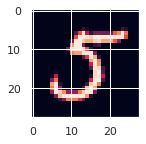

In [23]:
for i in range(1,60_000, 1_000):
    plot_image_with_target(test_x, test_y, index_num=i)

### reshaping the arrays

Train and test images are of shape (28px x 28px). let's reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. QMNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 60,000px vectors to 28x28x3 3D matrices.

In [24]:
train_x[0].shape

(28, 28)

In [25]:
train_x = train_x.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

In [26]:
train_x[0].shape, test_x[0].shape

((28, 28, 1), (28, 28, 1))

## label encoding the y arrays

Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

In [27]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [28]:
train_y = to_categorical(train_y, num_classes = 10)

In [29]:
train_y[:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## making the validation split

making a split, that's other than test set that model will not see, so I would use this to check model's performance and improve upon it.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
train_x.shape

(60000, 28, 28, 1)

In [32]:
60_000 * 0.05

3000.0

In [33]:
X_train, X_val, Y_train, Y_val = train_test_split(train_x, train_y, test_size = 0.05, random_state=2)

In [34]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((57000, 28, 28, 1), (3000, 28, 28, 1), (57000, 10), (3000, 10))

# second model

## building model

In [35]:
from tensorflow import keras
from tensorflow.keras import layers

import pydot

import keras.backend as keras_backend

keras_backend.set_image_data_format('channels_last')

In [36]:
input_shape = train_x[0].shape
input_shape

(28, 28, 1)

In [38]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer="he_uniform"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_initializer="he_uniform"),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Flatten(),
        layers.Dense(units=1024, activation="relu"),
        layers.Dense(units=1024, activation="relu"),
        layers.Dense(units=10, activation="softmax")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1639424   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

In [40]:
history_model1 = model.fit(x=X_train, y=Y_train, batch_size=128, epochs=10, validation_data = (X_val,Y_val))

Epoch 1/10
446/446 [==============================] - 66s 148ms/step - loss: 0.1534 - accuracy: 0.9542 - val_loss: 0.0606 - val_accuracy: 0.9787
Epoch 2/10
446/446 [==============================] - 66s 147ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0414 - val_accuracy: 0.9860
Epoch 3/10
446/446 [==============================] - 66s 147ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 4/10
446/446 [==============================] - 66s 147ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0393 - val_accuracy: 0.9880
Epoch 5/10
446/446 [==============================] - 65s 147ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0478 - val_accuracy: 0.9850
Epoch 6/10
446/446 [==============================] - 65s 146ms/step - loss: 0.0141 - accuracy: 0.9951 - val_loss: 0.0469 - val_accuracy: 0.9900
Epoch 7/10
446/446 [==============================] - 65s 146ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0393 - val_ac

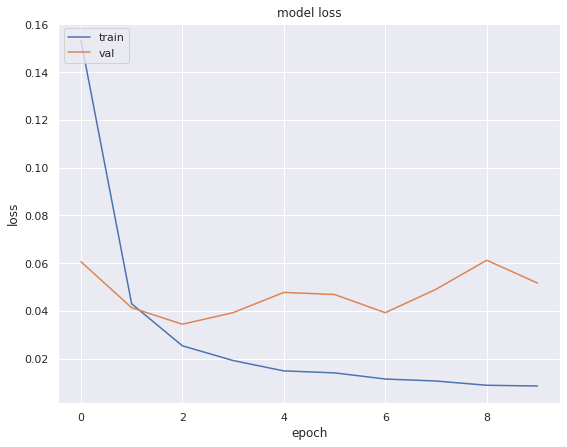

In [43]:
sns.set(rc={'figure.figsize':(9,7)})
plt.plot(history_model1.history['loss'])
plt.plot(history_model1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

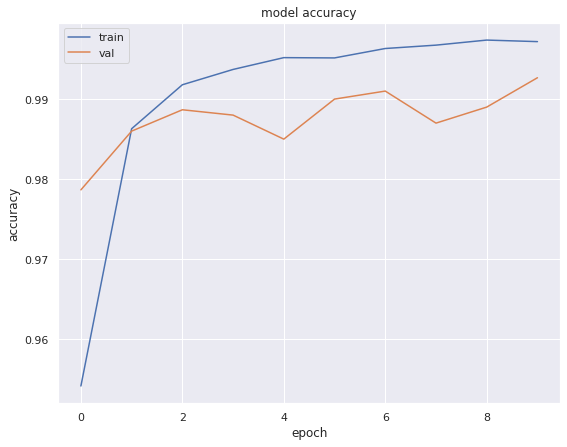

In [44]:
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# model 3

In [46]:
model = None

In [47]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                      kernel_initializer="he_uniform", kernel_regularizer='l2'),
        layers.MaxPooling2D(pool_size=(2, 2)),
     
        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                      kernel_initializer="he_uniform", kernel_regularizer='l2'),
        layers.AveragePooling2D(pool_size=(2, 2)),
     
        layers.Flatten(),
        layers.Dense(units=1024, activation="relu"),
        layers.Dense(units=1024, activation="relu"),
        layers.Dense(units=10, activation="softmax")
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1639424   
_________________________________________________________________
dense_7 (Dense)              (None, 1024)             

In [50]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=["accuracy"])

In [49]:
history_model2 = model.fit(x=X_train, y=Y_train, batch_size=128, epochs=10, validation_data = (X_val,Y_val))

Epoch 1/10
446/446 [==============================] - 65s 146ms/step - loss: 0.8056 - accuracy: 0.9554 - val_loss: 0.3003 - val_accuracy: 0.9787
Epoch 2/10
446/446 [==============================] - 65s 146ms/step - loss: 0.1889 - accuracy: 0.9827 - val_loss: 0.1295 - val_accuracy: 0.9833
Epoch 3/10
446/446 [==============================] - 64s 144ms/step - loss: 0.0940 - accuracy: 0.9869 - val_loss: 0.0802 - val_accuracy: 0.9843
Epoch 4/10
446/446 [==============================] - 64s 144ms/step - loss: 0.0678 - accuracy: 0.9889 - val_loss: 0.0650 - val_accuracy: 0.9890
Epoch 5/10
446/446 [==============================] - 64s 143ms/step - loss: 0.0563 - accuracy: 0.9897 - val_loss: 0.0592 - val_accuracy: 0.9887
Epoch 6/10
446/446 [==============================] - 64s 143ms/step - loss: 0.0473 - accuracy: 0.9915 - val_loss: 0.0554 - val_accuracy: 0.9860
Epoch 7/10
446/446 [==============================] - 64s 142ms/step - loss: 0.0430 - accuracy: 0.9921 - val_loss: 0.0523 - val_ac

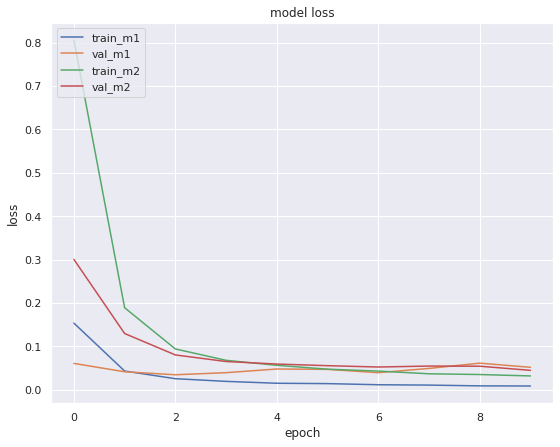

In [51]:
sns.set(rc={'figure.figsize':(9,7)})
plt.plot(history_model1.history['loss'])
plt.plot(history_model1.history['val_loss'])
plt.plot(history_model2.history['loss'])
plt.plot(history_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_m1', 'val_m1', 'train_m2', 'val_m2'], loc='upper left')
plt.show()

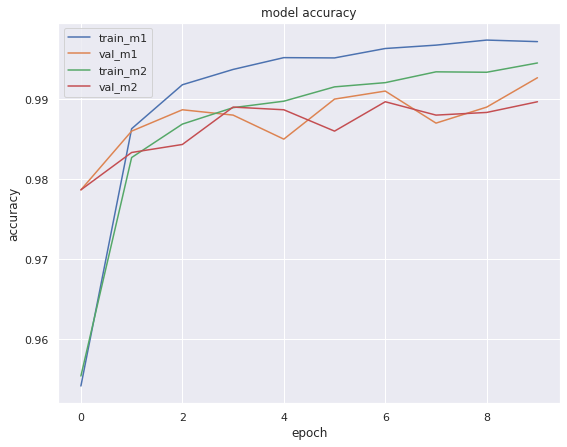

In [52]:
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_m1', 'val_m1', 'train_m2', 'val_m2'], loc='upper left')
plt.show()

# test set results

In [53]:
test_predictions = model.predict(x=test_x)

In [54]:
test_predictions[0]

array([3.7024776e-08, 5.1420384e-06, 4.6076912e-07, 5.6432195e-06,
       1.5024752e-07, 1.1305841e-08, 6.1238925e-10, 9.9998522e-01,
       3.5276901e-08, 3.4070138e-06], dtype=float32)

In [55]:
# select the indix with the maximum probability
test_predictions = np.argmax(test_predictions, axis = 1)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_true=test_y, y_pred=test_predictions) * 100

98.76333333333334

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cm = confusion_matrix(y_true=test_y, y_pred=test_predictions, labels=[0,1,2,3,4,5,6,7,8,9])

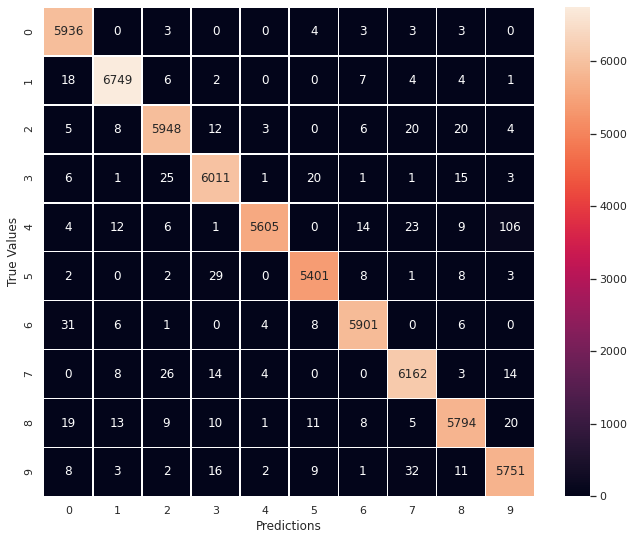

In [63]:
sns.set(rc={'figure.figsize':(11,9)})
sns.heatmap(data=cm, annot=True, fmt="d", linewidths=.5)
plt.ylabel("True Values")
plt.xlabel("Predictions")
plt.show()

let's see where this is going wrong mostly

In [69]:
mistakes = cm.sum(axis=0) - [cm[i][i] for i in range(cm.shape[0])]
mistakes_dict = {i:mistakes[i] for i in range(10)}
mistakes_dict

{0: 93, 1: 51, 2: 80, 3: 84, 4: 15, 5: 52, 6: 48, 7: 89, 8: 79, 9: 151}

In [76]:
sorted(mistakes_dict.items(), key=lambda item: item[1], reverse=True)

[(9, 151),
 (0, 93),
 (7, 89),
 (3, 84),
 (2, 80),
 (8, 79),
 (5, 52),
 (1, 51),
 (6, 48),
 (4, 15)]

It can be seen that, 9 and 0 had the most mistakes